# 机器学习算法基础

[toc]

## 1.KNN

### 算法思想

特征空间中的一个样本，如果与其最相似的k个样本中的大部分属于某个类别，则该样本也属于该类别。

### 特点

KNN的优点：简单有效，易于实现；无须训练（或训练很快）

KNN的缺点：懒惰算法，数据集的样本容量大时计算量比较大，评分慢；样本不平衡时，预测偏差比较大。

### KNN关键因素

度量距离

k值选择

决策规则

归一化

### 度量距离

欧式距离：两点间的连线距离。

曼哈顿距离：两点间的连线投影到坐标轴的长度之和。

切比雪夫距离：各坐标数值差的最大值，想想扫雷。

### 代码：用KNN预测鸢尾花品种

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',names=['sepal_length','sepal_width','petal_length','petal-width','class'])

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
from matplotlib import pyplot as plt

In [5]:
grouped_data=iris_data.groupby('class')# 分组

In [6]:
group_mean=grouped_data.mean()# 求平均数

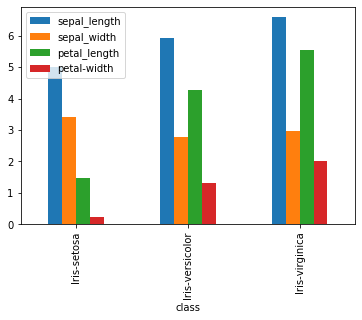

In [7]:
group_mean.plot(kind='bar')# 画柱状图

In [8]:
msk=np.random.rand(len(iris_data))<0.8# 生成随机数，并选择小于0.8的数据
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [9]:
train_data_origin=iris_data[msk]
test_data_origin=iris_data[~msk]

In [10]:
train_data_origin

,sepal_length,sepal_width,petal_length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [11]:
# 索引重置,True不保留原有的索引
train_data=train_data_origin.reset_index(drop=True)
test_data=test_data_origin.reset_index(drop=True)

In [12]:
train_label=train_data['class']
test_label=test_data['class']

In [13]:
# 1表示丢弃列，默认axis=0，表示行
train_feature=train_data.drop('class',1)
test_feature=test_data.drop('class',1)
train_feature

,sepal_length,sepal_width,petal_length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
115,6.7,3.3,5.7,2.5
116,6.7,3.0,5.2,2.3
117,6.3,2.5,5.0,1.9
118,6.5,3.0,5.2,2.0


归一化

In [14]:
# 因为不同特征之间差距过大，某个特征的权重会过高，所以要归一化
train_norm=(train_feature-train_feature.min())/(train_feature.max()-train_feature.min())
test_norm=(test_feature-test_feature.min())/(test_feature.max()-test_feature.min())
train_norm

,sepal_length,sepal_width,petal_length,petal-width
0,0.235294,0.625000,0.067797,0.041667
1,0.176471,0.416667,0.067797,0.041667
2,0.117647,0.500000,0.050847,0.041667
3,0.088235,0.458333,0.084746,0.041667
4,0.205882,0.666667,0.067797,0.041667
...,...,...,...,...
115,0.705882,0.541667,0.796610,1.000000
116,0.705882,0.416667,0.711864,0.916667
117,0.588235,0.208333,0.677966,0.750000
118,0.647059,0.416667,0.711864,0.791667


In [15]:
# 预测模型的正确率
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0

In [16]:
from sklearn import neighbors

In [17]:
# 定义knn模型
knn=neighbors.KNeighborsClassifier(n_neighbors=3)#k=3
knn.fit(train_norm,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
predict=knn.predict(test_norm)

In [19]:
accuracy=getAccuracy(test_label,predict)

In [20]:
print("Accuracy:"+repr(accuracy)+"%")

Accuracy:96.66666666666667%


### KNN总结

KNN算法是机器学习中最简单、有效的算法。本节通过鸢尾花品种分类的示例详细介绍了KNN算法的实现原理和应用。KNN算法属于懒惰学习算法，当数据集的样本容量比较大时，计算量也会比较大，并且需要较大的存储空间。此外，它无法给出数据的任何基础结构信息，后面章节中介绍的算法将会解决这个问题。

## 2.线性回归

### 简介

在统计学中，线性回归是一种线性方法，用于对因变量y和一个或多个自变量之间的线性关系进行建模。当只有一个自变量时，这种回归分析称为一元回归分析；当有两个或两个以上的自变量时，则称这种回归分析为多元回归分析。线性回归主要解决回归问题，即对**连续型的数据**进行预测，比如预测房价、销售量等

线性回归的目标是，对于输入向量x，预测其目标值y。

如果只是简单地使用预测值和真实值的差值来评估，会导致正差值和负差值相互抵消，并不符合实际情况，因此采用平方误差，该函数即可作为线性回归的损失函数。损失函数值越小，则ω越接近理想值，问题转化成了求解损失函数L（ω）取值最小值时的ω。



这个问题的求解方法有很多，比如采用数学方法对ω进行求解，这种方法称为正规方程。该方法主要是利用微积分的知识

除了正规方程外，在求解机器学习算法的模型参数时，另一种常用的方法是梯度下降法

多元函数对每个参数求偏导，然后将各个参数的偏导数组合成一个向量，该向量称为梯度，它的几何意义是函数值增加最快的方向。例如f（x,y），对参数x求偏导数为，对参数y求偏导数为，组成梯度向量，简称为▽f（x,y）。函数f（x,y）在点（x0,y0）处，如果沿着梯度方向▽f（x,y）移动，其函数值增加得最快，换句话说，就是能更快地找到最大值。反之，如果沿着梯度的反方向移动，则函数值下降得最快，更容易找到最小值。

MSE（Mean Squared Error，均方误差）是指预测值和真实值差值平方的期望值，定义如下：

### 通过线性回归预测波士顿房屋价格

In [21]:
from sklearn import datasets # scikit-learn集成的数据

In [22]:
boston=datasets.load_boston()

In [23]:
X=boston.data #这是一个向量
y=boston.target

使用train_test_split将数据集划分为训练集特征、测试集特征、训练集标签、测试集标签4个数据集。将test_size参数设为1/5，表示测试集在划分数据中的占比为1/5，如果配置整数，则表示测试集中的样本个数。random_state是随机数发生器的种子。

In [24]:
from sklearn.model_selection import train_test_split # 书中此处有问题

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=0)

然后可以定义线性回归模型，并通过训练集特征X_train和训练集标签y_train对模型进行训练。模型训练完成后，使用predict（）函数对测试集特征X_test进行预测，得到预测结果y_pred。最后用均方误差评估模型预测效果。实现代码如下：

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [27]:
lr=LinearRegression()#线性回归

In [28]:
lr.fit(X_train,y_train)#训练模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=lr.predict(X_test)

In [30]:
mse=mean_squared_error(y_test,y_pred)#均方差评估预测效果，越小越好

In [31]:
print("MSE:"+str(mse))

MSE:33.44897999767653


## 3.逻辑回归

### 简介

逻辑回归（logistic regression）算法也是机器学习中的经典算法之一。虽然名为回归，但其实它是一个分类算法，而非回归算法。逻辑回归算法具有模型简单、易于理解、计算代价不高等优点，是解决分类问题的一个很好的工具。但是，它具有容易欠拟合等缺点。因此，我们在使用时要结合算法的优缺点，在不同的应用场景中灵活运用。

我们学习了用于预测连续值（如房价）的线性回归算法，而有些应用场景下需要预测的是一个离散变量，例如分类问题——判断邮件是否为垃圾邮件。它只有两个取值，1代表是垃圾邮件，0代表不是，因此确切地说，这是一个二分类问题，**逻辑回归可用来解决二分类问题。**

逻辑回归在线性回归的基础上引入了sigmoid函数

P（Y=1|x）表示在特征x的条件下类别为1的概率，P（Y=0|x）表示类别为0的概率。因此，需要找到一个最优的ω，使得当样本属于类别1时，P（Y=1|x）最大，而当样本属于类别0时，P（Y=0|x）最大。

### 模型评估

逻辑回归算法解决的是二分类问题，二分类问题中常用的评估指标有精确率、召回率、F1-Score、AUC等。本节主要介绍精确率、召回率、F1-Score，其他评估指标会在第7章详细介绍。

### 良性/恶性乳腺肿瘤预测

In [32]:
from sklearn import datasets

In [33]:
cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

其中，X为特征数据，包含上面介绍的30个特征，y为标签数据，标记乳腺肿瘤类型，1代表良性，0代表恶性。

划分数据

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=9)

定义模型

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)# 逻辑回归
lr.fit(X_train,y_train)# 训练模型
y_pred=lr.predict(X_test)# 预测

## 4.决策树

### 介绍

决策树算法也是机器学习中的经典算法之一，几乎每一本讲解机器学习的书中都会介绍。决策树是XGBoost模型的基本构成单元，因此通过本节的学习可以为深入理解XGBoost打下坚实的基础。1966年Hunt提出的CLS算法是最早的决策树算法。Quinlan在1986年提出的ID3、1993年提出的C4.5以及Breiman在1984年提出的CART，是迄今为止最具影响力的决策树算法。而今，决策树算法已经成为机器学习中最常用的算法之一，受到了机器学习研究者的极大青睐。

### 构造决策树

决策树的训练目标，其实就是得到一种分类规则，使数据集中的所有样本都能被划分到正确的类别。这样的决策树可能有多个，也可能没有，所以我们的目标是找到一棵能将大部分样本正确分类并且具有较好泛化能力的树。决策树学习的**损失函数一般是正则化的极大似然函数**。从所有的决策树中选出最优的决策树是NP完全问题，一般采用启发式算法近似求解，因此生成决策树过程中的每一步都会采用当前最优的决策。

首先，为根节点选择一个最优特征对数据集进行划分，然后分别对其子节点进行最优划分，即每一步求局部最优解，直至该子集的所有样本都被正确地分类，则生成分类对应的叶子节点。如果子集中还存在没有被正确分类的样本，则继续划分，直至生成一棵完整的决策树。

这样生成的决策树虽然可以对现有样本进行很好的分类，但是**泛化**能力不一定好，因此可能需要进行剪枝。另外，如果特征很多，则需要进行特征选择。

### 特征选择

特征选择是指选择出那些有分类能力的特征，作为决策树划分的特征。好的特征选择能够提升模型性能，帮助使用者理解数据样本的特点和结构，有利于进一步优化模型或算法。采用特征选择主要有如下益处：

·简化模型，缩短模型训练时间；

·避免维度灾难；

·减少过拟合，提高模型泛化能力。

那怎么衡量特征是否有分类能力呢？通常在特征选择中会使用信息增益、信息增益比等。不同的决策树算法选择不同的方法作特征选择，常用的决策树算法有ID3、C4.5、CART等。本节主要介绍ID3和C4.5，CART将在第5章中进行详细介绍。

**ID3**算法由Ross Quinlan于1986年提出。该算法根据最大信息增益的原则对数据集进行划分。从根节点开始，遍历所有未被使用的特征，计算特征的信息增益，选取信息增益最大的特征作为节点分裂的特征，然后为该特征的每一个可能取值分别生成子节点，再对子节点递归调用上述方法，直到所有特征的信息增益均小于某阈值或没有特征可以选择。最终，对于每个叶子节点，将其中样本数量最多的类作为该节点的类标签。

**C4.5**是ID3算法的扩展，其构建决策树的算法过程也与ID3算法相似，唯一的区别在于C4.5不再采用信息增益，而是采用信息增益比进行特征选择，解决了ID3算法不能处理连续取值特征的问题。

**CART**和ID3、C4.5算法类似，也是由特征选择、决策树构建和剪枝几部分组成。CART采用的是二分递归分裂的思想，因此生成的决策树均为二叉树。CART包含两种类型的决策树：分类树和回归树。分类树的预测值是离散的，通常会将叶子节点中多数样本的类别作为该节点的预测类别。回归树的预测值是连续的，通常会将叶子节点中多数样本的平均值作为该节点的预测值。分类树采用基尼系数进行特征选择，而回归树采用均方误差。CART是XGBoost树模型的重要组成部分，详细介绍参见第5章相关内容。

### 决策树剪枝

剪枝是决策树算法中必不可少的一部分。因为在决策树学习的过程中，为了尽可能正确地分类训练样本，算法会过多地进行节点分裂，导致生成的决策树非常详细且复杂。这样的模型对样本噪声非常敏感，容易产生过拟合，对新样本的预测能力也较差，因此需要通过决策树剪枝来提高模型的泛化能力。

决策树的剪枝策略分为预剪枝（pre-pruning）和后剪枝（post-pruning）两类。预剪枝是在决策树分裂过程中，在每个节点分裂前预先进行评估，若该节点分裂后并不能使决策树模型泛化能力有所提升，则该节点不分裂。后剪枝则是先构造一棵完全决策树，然后自底向上对非叶子节点进行评估，若将该非叶子节点剪枝有助于决策树模型泛化能力的提升，则将该节点子树剪去，使其变为叶子节点。

### 决策树解决肿瘤分类问题

加载数据

In [36]:
from sklearn import datasets

cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


划分训练集和测试集

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=8)

训练和预测，并且评估预测效果。

In [38]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# 决策树
clf=tree.DecisionTreeClassifier(max_depth=4)

# 训练模型
clf.fit(X_train,y_train)

# 预测
y_pred=clf.predict(X_test)

# 评估结果
print(classification_report(y_test,y_pred,target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.95      0.87      0.91        46
   Malignant       0.92      0.97      0.94        68

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



决策树可视化

In [39]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file="tree.dot",
                              feature_names=cancer.feature_names,
                              class_names=cancer.target_names,
                              filled=True,rounded=True,
                              special_characters=True)

In [40]:
graph=graphviz.Source(dot_data)

In [42]:
graph.view()

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Source.gv'], make sure the Graphviz executables are on your systems' PATH